### Economic Status and Life Expectancy

Over the course of the past few centuries, technological and medical advancements have helped increase the life expectancy of humans. However, as of now, the average life expectancy of humans varies depending on what country you live in.

In this project, we will investigate a dataset containing information about the average life expectancy in 158 different countries. We will specifically look at how a country’s economic success might impact the life expectancy in that area.

We will be using the statistical calculations, particularly quartiles, quantiles and IQR.

In [1]:
# let's import the libraries first.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# let's load the data and get a sense of wha this data looks like.
data = pd.read_csv(r"C:\Users\amanp\OneDrive\Desktop\country_data.csv")

In [3]:
data.head()

,Country,Life Expectancy,GDP
0,Afghanistan,58.19375,340.015425
1,Albania,75.15625,2119.726679
2,Algeria,73.61875,2847.853392
3,Angola,49.01875,1975.143045
4,Antigua and Barbuda,75.05625,9759.305728


So the three column names are 'Country', 'Life Ecpectancy' and 'GDP'.

In [4]:
# Let’s isolate the column that contains the life expectancy and store it in a variable named life_expectancy.

life_expectancy = data['Life Expectancy']

### Finding the Quantiles

#### 1. Splitting the data by Life Expectancy

In [5]:
# Let’s use the np.quantile() function to find the quartiles of life_expectancy. Store the result in a variable named 
# life_expectancy_quartiles.

life_expectancy_quartiles = np.quantile(life_expectancy, [0.25, 0.50, 0.75])
print(life_expectancy_quartiles)

[62.325     72.525     75.4421875]


By looking at those three values we get a sense of the spread of the data. It seems like some of the data is fairly close together — a quarter of the data is between 72.5 years and 75.4 years.

Let's plot a histogram to see the results.

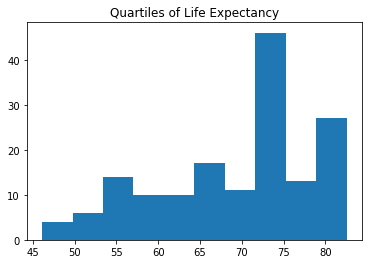

In [6]:
plt.hist(life_expectancy)
plt.title('Quartiles of Life Expectancy')
plt.show()

The narrowest quartile is between 72 and 75 years. We can see this represented in the histogram through the larger spike of data around 75.

#### 2. Splitting the data by GDP

In [7]:
# GDP is a mesaure of a country’s wealth. Let’s now use the GDP data to see if life expectancy is affected by this value.
# Let’s split the data into two groups based on GDP. If we find the median GDP, we can create two datasets for “low GDP countries” and “high GDP countries.

# To start, let’s isolate the GDP column and store it in a variable named gdp.

gdp = data['GDP']


In [8]:
# let's find the median gdp

median_gdp = np.quantile(gdp, 0.5)

In [9]:
# Let’s now grab all of the rows from our original dataset that have a GDP less than or equal to the median and do the same for 
# all of the rows that have a GDP higher than the median.

low_gdp = data[data['GDP'] <= median_gdp]
high_gdp = data[data['GDP'] > median_gdp]


In [10]:
# Now that we’ve split the data based on the GDP, let’s see how the life expectancy of each group compares to each other by 
# finding the quartiles.

high_gdp_quartiles = np.quantile(high_gdp['Life Expectancy'], [0.25, 0.50, 0.75])
low_gdp_quartiles = np.quantile(low_gdp['Life Expectancy'], [0.25, 0.50, 0.75])

In [11]:
print('Low gdp quartiles:')
print(low_gdp_quartiles)
print('High gdp quartiles:')
print(high_gdp_quartiles)

Low gdp quartiles:
[56.3375  64.34375 71.7375 ]
High gdp quartiles:
[72.965625 75.15625  80.521875]


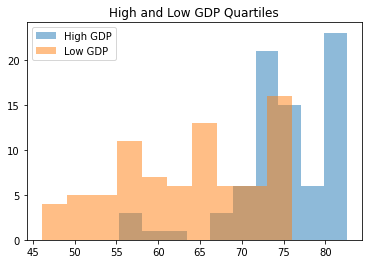

In [12]:
# let’s plot a histogram of each dataset to really compare them.

plt.hist(high_gdp["Life Expectancy"], alpha = 0.5, label = "High GDP")
plt.hist(low_gdp["Life Expectancy"], alpha = 0.5, label = "Low GDP")
plt.title('High and Low GDP Quartiles')
plt.legend()
plt.show()

### Conclusion:

We can now truly see the impact GDP has on life expectancy.

Let's consider a country that has a life expectancy of 70 years. If that country is in the top half of GDP countries,  it falls in the first quarter of that dataset, since, 70 is below the first quartile of the high GDP dataset.  

But if that country is in the bottom half of GDP countries, it falls in the third quarter since, 70 is between the second and third quartile of the low GDP dataset.